In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#dir(prophet)

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ETH-USD.csv to ETH-USD (1).csv
User uploaded file "ETH-USD.csv" with length 172876 bytes


In [ ]:
import io
df = pd.read_csv(io.StringIO(uploaded['ETH-USD.csv'].decode('utf-8')))
df= df.drop(columns = ['date','open','low','high','volume','close'])
df.head()

,timestamp,adjclose
0,11/9/2017 0:00,320.884003
1,11/10/2017 0:00,299.252991
2,11/11/2017 0:00,314.681000
3,11/12/2017 0:00,307.907989
4,11/13/2017 0:00,316.716003


In [ ]:
df['timestamp'] = pd.to_datetime(df["timestamp"])
df.set_index('timestamp', inplace = True)


Text(0, 0.5, 'price (in USD)')

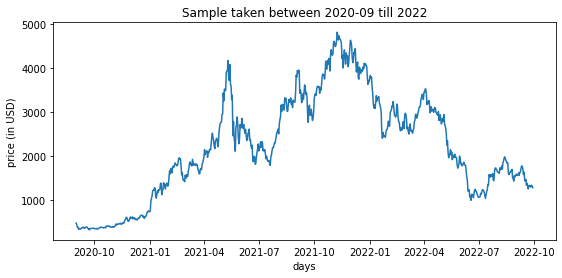

In [ ]:
plt.figure(figsize=(9,4))
df = df.loc['2020-9' : '2022']
plt.plot(df['adjclose'])
plt.title("Sample taken between 2020-09 till 2022" )
plt.xlabel("days")
plt.ylabel("price (in USD)")

In [ ]:
#df.columns = ['ds','y']
df['y']= df['adjclose'][:]
df['ds'] = df.index.values
a = np.arange(len(df))
df.set_index(a, inplace = True)

In [ ]:
df = df.drop(columns =['adjclose'])
df

,y,ds
0,477.051910,2020-09-01 00:00:00
1,440.040497,2020-09-02 00:00:00
2,385.671936,2020-09-03 00:00:00
3,388.241150,2020-09-04 00:00:00
4,335.260071,2020-09-05 00:00:00
...,...,...
753,1317.993286,2022-09-24 00:00:00
754,1294.216797,2022-09-25 00:00:00
755,1335.320190,2022-09-26 00:00:00
756,1330.127686,2022-09-27 00:00:00


In [ ]:
df['ds'] = pd.to_datetime(df["ds"])

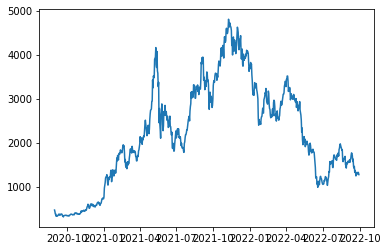

In [ ]:
plt.plot(df['ds'],df['y'])

In [ ]:
len(df)

758

In [ ]:

to_row = int(len(df)-198)
train  = df.iloc[:len(df)-198]
test = df.iloc[to_row:]
test

,y,ds
560,2620.149658,2022-03-15 00:00:00
561,2772.055664,2022-03-16 00:00:00
562,2814.854492,2022-03-17 00:00:00
563,2945.343018,2022-03-18 00:00:00
564,2946.257080,2022-03-19 00:00:00
...,...,...
753,1317.993286,2022-09-24 00:00:00
754,1294.216797,2022-09-25 00:00:00
755,1335.320190,2022-09-26 00:00:00
756,1330.127686,2022-09-27 00:00:00


In [ ]:
df.head()

,y,ds
0,477.051910,2020-09-01
1,440.040497,2020-09-02
2,385.671936,2020-09-03
3,388.241150,2020-09-04
4,335.260071,2020-09-05


In [ ]:
df.tail()

,y,ds
753,1317.993286,2022-09-24 00:00:00
754,1294.216797,2022-09-25 00:00:00
755,1335.320190,2022-09-26 00:00:00
756,1330.127686,2022-09-27 00:00:00
757,1281.931763,2022-09-28 08:54:00


In [ ]:
# Initialize the Model
from prophet import Prophet
model= Prophet()
model.fit(train)
future = model.make_future_dataframe(periods =198)
forecast = model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppz9af6wo/y_nxflik.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppz9af6wo/zw18jrm_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18733', 'data', 'file=/tmp/tmppz9af6wo/y_nxflik.json', 'init=/tmp/tmppz9af6wo/zw18jrm_.json', 'output', 'file=/tmp/tmppz9af6wo/prophet_model0dhny6ex/prophet_model-20230311201104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:11:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:11:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
753,2022-09-24,-595.493924,-2287.307617,846.793763,-2152.742357,813.129617,-7.887732,-7.887732,-7.887732,-7.887732,-7.887732,-7.887732,0.0,0.0,0.0,-603.381656
754,2022-09-25,-611.191583,-2311.788043,816.964888,-2179.330908,811.620714,-2.608982,-2.608982,-2.608982,-2.608982,-2.608982,-2.608982,0.0,0.0,0.0,-613.800565
755,2022-09-26,-626.889242,-2275.676218,858.087036,-2211.763809,807.931653,-2.229238,-2.229238,-2.229238,-2.229238,-2.229238,-2.229238,0.0,0.0,0.0,-629.118480
756,2022-09-27,-642.586901,-2340.146073,893.954148,-2241.810375,806.841121,5.257494,5.257494,5.257494,5.257494,5.257494,5.257494,0.0,0.0,0.0,-637.329408
757,2022-09-28,-658.284560,-2401.385374,927.639792,-2275.933867,799.469182,19.712233,19.712233,19.712233,19.712233,19.712233,19.712233,0.0,0.0,0.0,-638.572328


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()
future=pd.DataFrame(forecast,columns=['ds','yhat','yhat_lower','yhat_upper'])


In [ ]:
# from google.colab import files
# future.to_csv('BNB_predictions.csv', encoding = 'utf-8-sig')
# files.download('BNB_predictions.csv')

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
753,2022-09-24,-603.381656,-2287.307617,846.793763
754,2022-09-25,-613.800565,-2311.788043,816.964888
755,2022-09-26,-629.118480,-2275.676218,858.087036
756,2022-09-27,-637.329408,-2340.146073,893.954148
757,2022-09-28,-638.572328,-2401.385374,927.639792


In [ ]:
test.tail()

,y,ds
753,1317.993286,2022-09-24 00:00:00
754,1294.216797,2022-09-25 00:00:00
755,1335.320190,2022-09-26 00:00:00
756,1330.127686,2022-09-27 00:00:00
757,1281.931763,2022-09-28 08:54:00


In [ ]:
train.tail()

,y,ds
555,2608.048584,2022-03-10
556,2559.562988,2022-03-11
557,2574.754150,2022-03-12
558,2518.944580,2022-03-13
559,2590.696045,2022-03-14


In [ ]:
plot_plotly(model,forecast)

In [ ]:
validate = model.predict(test)
validate[['ds','yhat','yhat_lower','yhat_upper']].head(10)

,ds,yhat,yhat_lower,yhat_upper
0,2022-03-15,2439.411766,2053.872210,2842.726376
1,2022-03-16,2438.168846,2003.295466,2888.778448
2,2022-03-17,2404.554646,1959.112804,2824.036960
3,2022-03-18,2373.021828,1932.304164,2834.549190
4,2022-03-19,2363.475904,1969.887515,2826.495373
5,2022-03-20,2353.056995,1939.208003,2795.796859
6,2022-03-21,2337.739080,1933.723044,2769.378117
7,2022-03-22,2329.528152,1915.345362,2772.298922
8,2022-03-23,2328.285232,1922.361771,2747.486203
9,2022-03-24,2294.671033,1869.389239,2683.214437


In [ ]:
model_predictions= validate['yhat'].values
model_predictions


array([2439.41176558, 2438.16884554, 2404.55464648, 2373.02182817,
       2363.47590362, 2353.05699494, 2337.73907959, 2329.52815225,
       2328.28523221, 2294.67103315, 2263.13821484, 2253.59229029,
       2243.17338161, 2227.85546626, 2219.64453892, 2218.40161888,
       2184.78741982, 2153.25460151, 2143.70867696, 2133.28976828,
       2117.97185293, 2109.76092559, 2108.51800555, 2074.90380649,
       2043.37098818, 2033.82506363, 2023.40615495, 2008.0882396 ,
       1999.87731226, 1998.63439222, 1965.02019316, 1933.48737485,
       1923.9414503 , 1913.52254162, 1898.20462627, 1889.99369893,
       1888.75077889, 1855.13657983, 1823.60376152, 1814.05783697,
       1803.63892829, 1788.32101294, 1780.1100856 , 1778.86716556,
       1745.2529665 , 1713.72014819, 1704.17422364, 1693.75531496,
       1678.43739961, 1670.22647227, 1668.98355223, 1635.36935317,
       1603.83653486, 1594.2906103 , 1583.87170163, 1568.55378628,
       1560.34285894, 1559.0999389 , 1525.48573984, 1493.95292

In [ ]:
testing_data= test['y'].values
testing_data.shape

(198,)

Model Validation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


#Method 1: Using R2 SCORE
print("Computing the R-squared value:")
r2_score = r2_score(testing_data,model_predictions)
print(f'r2_score:{r2_score}')

Computing the R-squared value:
r2_score:-1.9052306479811003


In [ ]:
# Method2: Report performance check with MEAN ABSOLUTE PERCENTAGE ERROR
MAPE = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data)) / np.abs(testing_data))
print(f'Mean_Absolute_Percentage_Error:{MAPE}')

Mean_Absolute_Percentage_Error:0.6043989104911532


In [ ]:
# Method3: Using MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(model_predictions,testing_data)
print(f'Mean_Absolute_Error:{MAE}')

Mean_Absolute_Error:1085.4239973983076


In [ ]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(model_predictions,testing_data)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

1223.8690880623255


Visualization of Results

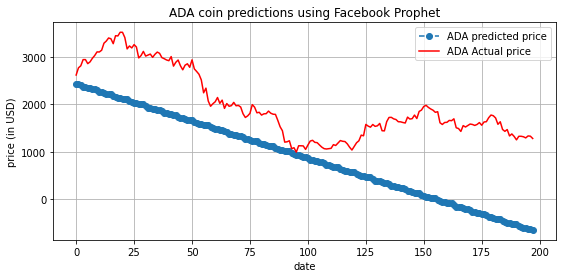

In [ ]:
plt.figure(figsize=(9,4))
plt.grid(True)
date_range = np.arange(len(testing_data))
#plt.plot(date_range, model_predictions[:-1],color='blue',marker='o',linestyle ='dashed',label = "ADA predicted price")
plt.plot(date_range,model_predictions,marker='o',linestyle ='dashed',label = "ADA predicted price")
plt.plot(date_range,testing_data,color='red',label = "ADA Actual price")
plt.title("ADA coin predictions using Facebook Prophet")
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.tight_layout
plt.show()

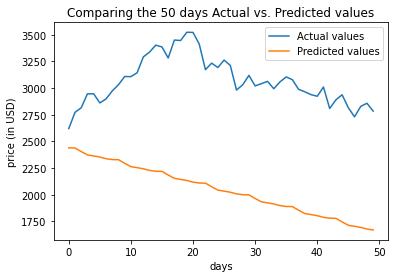

In [ ]:
plt.plot(testing_data[:50],label = 'Actual values')
plt.plot(model_predictions[:50], label = 'Predicted values')
plt.title('Comparing the 50 days Actual vs. Predicted values')
plt.xlabel('days')
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

Model Validation of Forecasting of Next 10 days

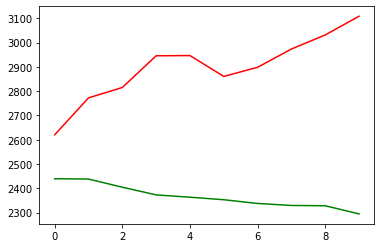

In [ ]:
Actual = testing_data[:10]
predicted = model_predictions[:10]
plt.plot(Actual, color='red')
plt.plot(predicted,color = 'green')

In [ ]:
# performance Evaluation of 10 days Predictions

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print("Computing the R-squared value:")
r2_score = r2_score(Actual,predicted)
print(f'r2_score:{r2_score}')

Computing the R-squared value:
r2_score:-16.99506105191481


In [ ]:
# report performance
MAPE = np.mean(np.abs(np.array(predicted) - np.array(Actual)) / np.abs(Actual))
print(f'Mean_Absolute_Percentage_Error:{MAPE}')

Mean_Absolute_Percentage_Error:0.18080489491319746


In [ ]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(Actual, predicted)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

558.6352224701776


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(predicted,Actual))

530.7442477475712
